In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import fastai
import pandas as pd
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.data.all import *

In [4]:
csv_path = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv"
df = pd.read_csv(csv_path)
df.sort_values(by="image_id")

,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk


In [5]:
short_to_full_name_dict = {
    "akiec" : "Bowen's disease",
    "bcc" : "basal cell carcinoma" , 
    "bkl" : "benign keratosis-like lesions", 
    "df" : "dermatofibroma", 
    "mel" : "melanoma", 
    "nv" : "melanocytic nevi", 
    "vasc" : "vascular lesions", 
}

In [6]:
img_to_class_dict = df.loc[:, ["image_id", "dx"]]
img_to_class_dict = img_to_class_dict.to_dict('list')  
img_to_class_dict = {img_id : short_to_full_name_dict[disease] for img_id,disease in zip(img_to_class_dict['image_id'], img_to_class_dict['dx']) } 
[x for x in img_to_class_dict.items()][:5]

[('ISIC_0027419', 'benign keratosis-like lesions'),
 ('ISIC_0025030', 'benign keratosis-like lesions'),
 ('ISIC_0026769', 'benign keratosis-like lesions'),
 ('ISIC_0025661', 'benign keratosis-like lesions'),
 ('ISIC_0031633', 'benign keratosis-like lesions')]

In [7]:
def get_label_from_dict(path):
    return img_to_class_dict[path.stem]

skin_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=[Resize(450), DihedralItem()], 
    batch_tfms=RandomResizedCrop(size=224, min_scale=0.75, max_scale=1.0), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42), 
    get_y=get_label_from_dict, 
)

img_path = "/kaggle/input/skin-cancer-mnist-ham10000"
dls = skin_db.dataloaders(img_path)

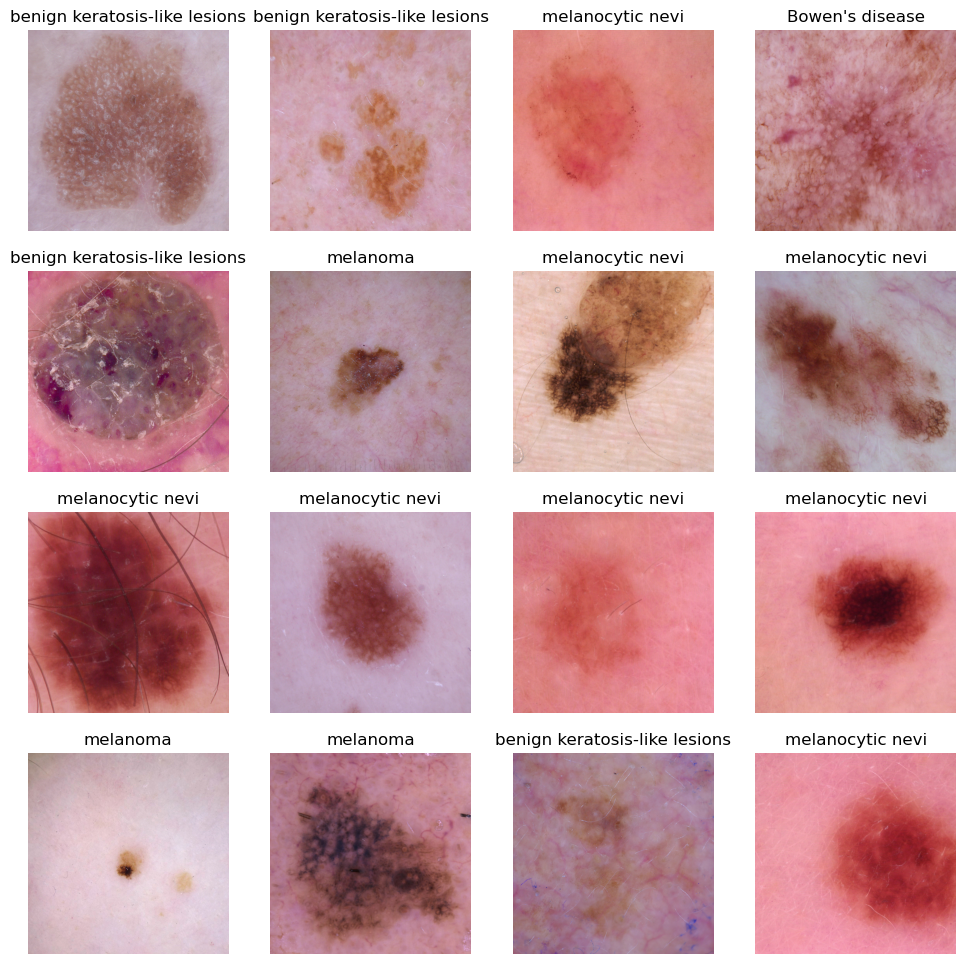

In [8]:
dls.show_batch(max_n=16, nrows=4)

In [10]:
!pip install GPUtil

ERROR: Could not find a version that satisfies the requirement GPUtil (from versions: none)
ERROR: No matching distribution found for GPUtil


In [1]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, opt_func=ranger)
learn.fine_tune(epochs=30, freeze_epochs=3, base_lr=0.005, cbs=MixUp(0.5))

NameError: name 'cnn_learner' is not defined